In [1]:
import csv, os
import numpy as np
import pandas as pa
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = '/Users/richardbanyi/Developer/itu/2017-dm/lab1/javacode/data.csv'
csv_write = '/Users/richardbanyi/Developer/itu/2017-dm/mini-project/data/data.csv'
# source = open(path, 'r')
# csv_file = open(csv_write, 'w')
# writer = csv.writer(csv_file, delimiter=',', quotechar='"')

In [3]:
# Getting know your data - import as list
# reader = list(csv.reader((line.replace(';;', ';') for line in source), delimiter=';', quotechar='"'))

In [4]:
def filternum(num):
    """Filter out only numbers with regex"""
    
    match = re.match('\d+', str(num))
    if match is not None:
        return int(match.group(0))
    else:
        return np.nan

In [5]:
def genfilter(gender):
    """Normalized Genters two to grups male/female"""
    
    if (gender.lower() == 'male' or 
        gender.lower() == 'm' or
        gender.lower() == 'Man'
       ):
        return 'male'
    if (gender.lower() == 'female' or gender.lower() == 'f'):
        return 'female'
    else:
        return np.nan

In [6]:
def seats(seat):
    """Normalzize seats"""
    
    if len(str(seat)) > 1:
        return np.nan
    else:
        return str(seat)

In [9]:
data = pa.read_csv(csv_write, sep=',', na_values=['unknown', 'Meh', 'none', 'NaN'], header=None, skiprows=1,
                  converters={2: lambda x: genfilter(x),
                              3: lambda x: float(x.replace(',','.')),
                              4: lambda x: float(re.match('\d+', str(x)).group(0)),
                              7: lambda x: x.strip(),
                              39: lambda x: filternum(x),
                              43: lambda x: seats(x),
                              44: lambda x: filternum(x)
                             } 
                  )

In [12]:
data_subset = data.loc[:, [1, 3, 4, 7, 2]]

In [13]:
split = lambda x: pa.Series([i for i in reversed(re.split('; |,', x.lower()))])

In [14]:
data_subset.columns = ['age', 'shoe_size', 'height', 'language', 'gender']

In [15]:
data_subset.describe()

,age,shoe_size,height
count,67.000000,67.000000,67.000000
mean,40.701493,41.537313,175.298507
std,118.907784,5.915640,25.702856
min,22.000000,2.000000,34.000000
25%,24.000000,40.750000,172.000000
50%,25.000000,42.500000,180.000000
75%,28.000000,44.250000,186.500000
max,999.000000,49.000000,205.000000


In [16]:
data_subset['gender'].value_counts()

male      55
female     9
Name: gender, dtype: int64

In [17]:
data_subset.shape

(67, 5)

In [18]:
data_subset = data_subset.dropna(axis=0)

In [19]:
data_subset.shape

(64, 5)

In [20]:
# Dataframe for Appriori
language = data_subset['language'].apply(split)

In [25]:
# Dataframe  for Classification & Clustering
x_np = data_subset.loc[:, ['age', 'shoe_size', 'height']].as_matrix()
y_np = data_subset.loc[:, ['gender']].as_matrix()

In [26]:
# Standarization
z_scores_np = (x_np - x_np.mean()) / x_np.std()

In [27]:
# Min-Max scalling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

In [28]:
def plot():
    """Plot Normalization"""
    plt.figure(figsize=(8,6))
    
    #plt.scatter(x_np[:, 0:1], x_np[:, 1:2], color='green',
    #           label='Input Scale', alpha=0.5)
    
    #plt.scatter(z_scores_np[:, 0:1], z_scores_np[:, 1:2], color='blue',
    #           label='Standardized with Z-Score', alpha=0.3)
    
    plt.scatter(np_minmax[:, 0], np_minmax[:, 1], color='red',
                label='Min-Max scaled [min=0, max=1]', alpha=0.3)
    
    plt.title('ITU Dataset Normalization')
    plt.xlabel('Age')
    plt.ylabel('Shoes Size')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout

ValueError: x and y must be the same size

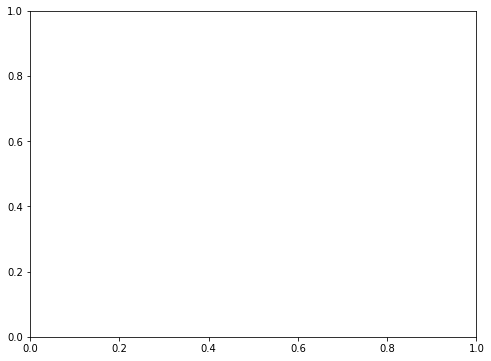

In [29]:
plt.figure(figsize=(8,6))
y_pos = [0 for i in range(len(x_np))]
plt.scatter(z_scores_np[: 0], y_pos, color='b')
plt.set_title('Python NumPy standardization', color='b')
plt.grid()
plt.tight_layout
plt.show()

In [ ]:
plot()

In [39]:
class_data = np.concatenate((z_scores_np, y_np), axis=1)
class_data_ = np.concatenate((np_minmax, y_np), axis=1)

In [49]:
np.savetxt("data/z_scores.csv", class_data, delimiter=",", fmt="%s")
np.savetxt("data/n_minmax.csv", class_data_, delimiter=",", fmt="%s")